## Budget vs. US Gross Income in the U.S.
#### Hypothesis:
The higher the budget of the movie is, the more gross income in the U.S. the movie will have collected.

In [69]:
# tidying the data to just "USA" because too difficult to coerce all different currencies to type double 
usa_movies <- imdb_movies %>%
    filter(country == "USA") %>%
    separate(budget, into = c("currency", "budget"), sep = " ") %>%
    separate(usa_gross_income, into = c("dollar", "usa_gross_income"), sep = " ") %>%
    separate(worlwide_gross_income, into = c("dollar2", "worldwide_gross_income"), sep = " ") %>%
    select(-c("currency", "dollar", "dollar2")) %>%
    mutate(budget = as.double(budget), usa_gross_income = as.double(usa_gross_income), worldwide_gross_income = as.double(worldwide_gross_income)) %>%
    na.omit(usa_movies) %>%     # removed all observations with any missing values
    print(width = Inf)

# A tibble: 3,528 x 22
   imdb_title_id title                     original_title                   year
   <chr>         <chr>                     <chr>                           <dbl>
 1 tt0021749     Luci della città          City Lights                      1931
 2 tt0027977     Tempi moderni             Modern Times                     1936
 3 tt0029583     Biancaneve e i sette nani Snow White and the Seven Dwarfs  1937
 4 tt0031381     Via col vento             Gone with the Wind               1939
 5 tt0031679     Mr. Smith va a Washington Mr. Smith Goes to Washington     1939
 6 tt0032138     Il mago di Oz             The Wizard of Oz                 1939
 7 tt0032455     Fantasia                  Fantasia                         1940
 8 tt0032910     Pinocchio                 Pinocchio                        1940
 9 tt0033467     Quarto potere             Citizen Kane                     1941
10 tt0034583     Casablanca                Casablanca                       1942
   da

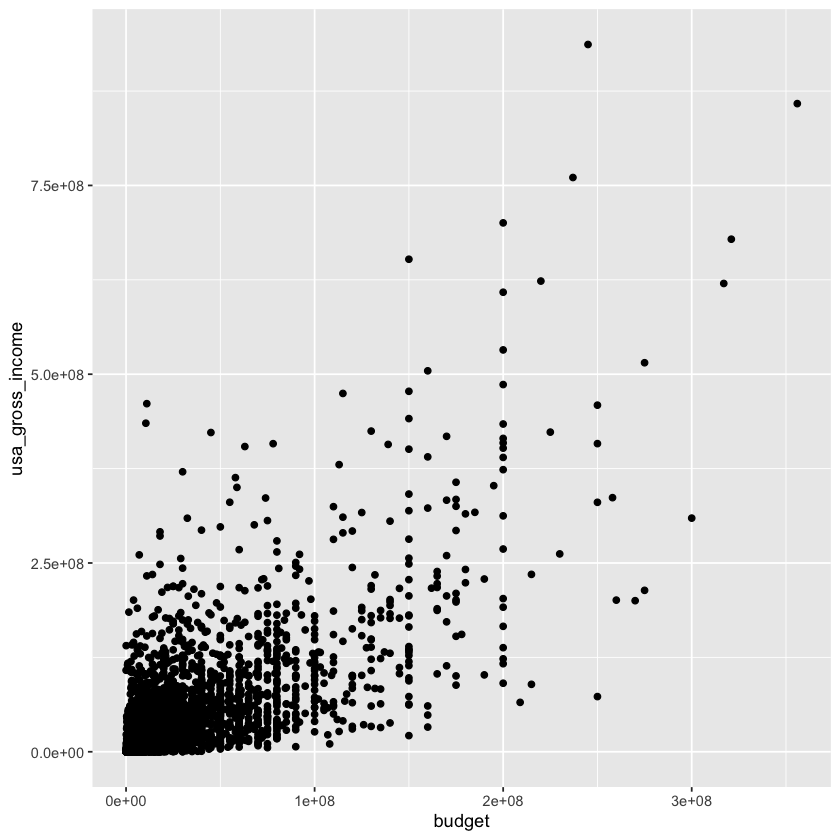

In [26]:
ggplot(usa_movies) +
    geom_point(aes(budget, usa_gross_income))

In [27]:
# training set is random 60% of total dataset
train1 <- usa_movies %>%
    sample_frac(0.60)

In [28]:
# this is the 40% split that will be divided into the 20%/20% validation and test sets
# intermediate step to get validation and test set
valid_test1 <- anti_join(usa_movies, train1, by = "imdb_title_id")

# validation set is 20% split of data 
valid1 <- valid_test1 %>%
    sample_frac(0.50)

# test set is last 20% of data
test1 <- anti_join(valid_test1, valid1, by = "imdb_title_id")

In [29]:
# linear model predicting expected usa_gross_income values from budget values
RMSE <- function(a, data) {
    preds <- a[1] + data$x * a[2]
    diffs <- data$y - preds
    sqrt(mean(diffs^2))
}

best2 <- optim(c(0, 0), RMSE,  data = mutate(train1, x = budget, y = usa_gross_income))
best2$par

[1] 0.3681073 1.3750078

In [30]:
# appears linear regression line was overfitted to training set
RMSE(best2$par, data = mutate(valid1, x = budget, y = usa_gross_income))

RMSE(best2$par, data = mutate(test1, x = budget, y = usa_gross_income))

[1] 52518406

[1] 64529805

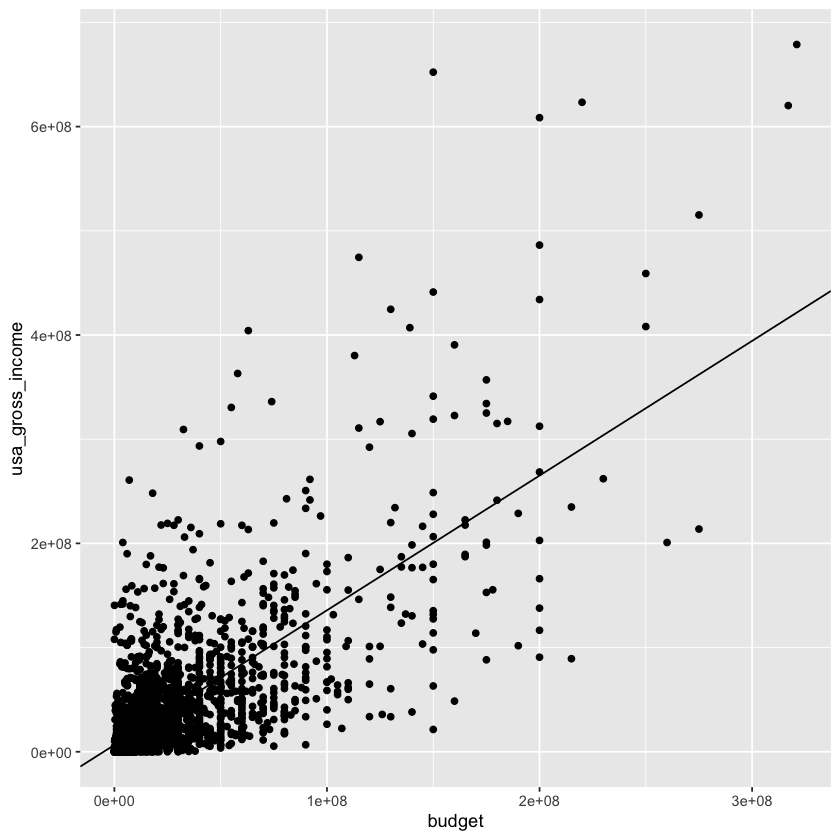

In [31]:
# plotted the training set with fitted model
ggplot(train1) +
    geom_point(aes(budget, usa_gross_income)) +
    geom_abline(aes(intercept = 6.515e+06, slope = 1.293e+00))

We confirmed our hypothesis (for the most part). It appears that the higher the budget of a movie is, the more gross income it will produce.